- https://raw.githubusercontent.com/krishnaik06/ANN-CLassification-Churn/refs/heads/main/Churn_Modelling.csv

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


### Preprocessing

In [40]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/ANN-CLassification-Churn/refs/heads/main/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# Devide the dataset into dependent and independent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [44]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [45]:
pd.get_dummies(X['Geography'], drop_first=True).head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


To convert the boolean values (`True`/`False`) to integers (`1`/`0`), you can simply multiply the boolean columns by `1` or use `.astype(int)`.

In [46]:
# feature engineering
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [47]:
geography = geography.astype(int)
gender = gender.astype(int)

display(geography.head())
display(gender.head())

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


,Male
0,0
1,0
2,0
3,0
4,0


In [48]:
# drop these two columns
# X.drop(['Geography', 'Gender'], axis=1, inplace=True)
X = X.drop(['Geography', 'Gender'], axis=1)

In [49]:
# concatenate these variables with dataframe
X = pd.concat([X, geography, gender], axis=1)
X.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2187,699,34,8,0.00,1,1,1,76510.46,0,1,1
1364,850,39,3,124548.99,2,1,1,120380.12,1,0,1


In [50]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (8000, 11)
X_test shape:  (2000, 11)
y_train shape:  (8000,)
y_test shape:  (2000,)


In [52]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [54]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

### ANN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [56]:
# initialize the ANN
classifier = Sequential()

In [57]:
# adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [58]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [59]:
# adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [60]:
# adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [61]:
# compile the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
# import tensorflow as tf
# classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [63]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6377 - loss: 0.6438 - val_accuracy: 0.7910 - val_loss: 0.4767
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7971 - loss: 0.4975 - val_accuracy: 0.7910 - val_loss: 0.4613
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8025 - loss: 0.4837 - val_accuracy: 0.7910 - val_loss: 0.4546
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8046 - loss: 0.4683 - val_accuracy: 0.7910 - val_loss: 0.4546
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8020 - loss: 0.4659 - val_accuracy: 0.7910 - val_loss: 0.4538
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7917 - loss: 0.4696 - val_accuracy: 0.7910 - val_loss: 0.4497
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8007 - loss: 0.4611 - val_accuracy: 0.7910 - val_loss: 0.4507
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7871 - loss: 0.4735 - val_accu

In [64]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [65]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [66]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7918 - loss: 0.3878 - val_accuracy: 0.7910 - val_loss: 0.3845
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8025 - loss: 0.3823 - val_accuracy: 0.7910 - val_loss: 0.3855
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7978 - loss: 0.3893 - val_accuracy: 0.7910 - val_loss: 0.3848
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7945 - loss: 0.3952 - val_accuracy: 0.7910 - val_loss: 0.3858
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7979 - loss: 0.3796 - val_accuracy: 0.7910 - val_loss: 0.3847
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8064 - loss: 0.3888 - val_accuracy: 0.7910 - val_loss: 0.3849
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8076 - loss: 0.3820 - val_accuracy: 0.7910 - val_loss: 0.3836
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7969 - loss: 0.3946 - val_accu

In [67]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

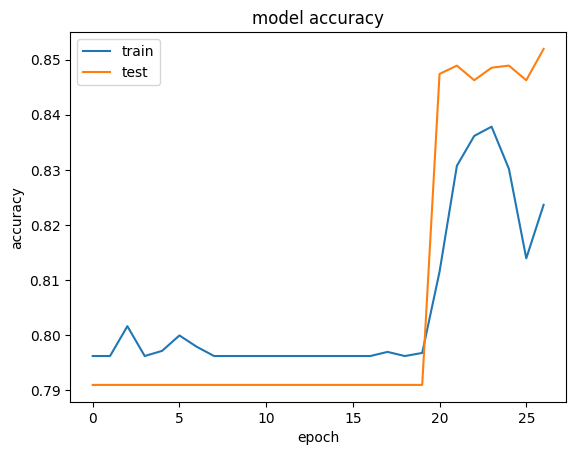

In [68]:
# sumarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

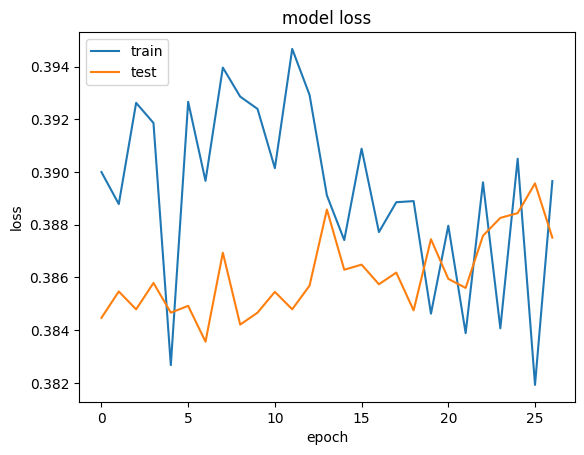

In [69]:
# sumarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
# making the predictions and evaluating the model
# predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [71]:
# make the confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1554,   53],
       [ 222,  171]])

In [72]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8625

In [73]:
# get the weights
classifier.get_weights()

[array([[-0.475138  , -0.15678984, -0.33886927,  0.15315373, -0.15114114,
          0.1624937 ,  0.15179126,  0.06158202,  0.07887582, -0.15071137,
          0.14524844],
        [ 0.26728725,  0.12363416, -0.8357031 , -0.76602966, -0.6262848 ,
          0.03960685, -0.15803161, -0.12914954,  0.9764823 , -0.07923537,
         -0.13988534],
        [-0.20638645,  0.11247384, -0.10362037, -0.01220845,  0.19293414,
          0.20764256, -0.13616894,  0.05180404,  0.18606868,  0.0055922 ,
         -0.06589357],
        [ 0.36734056, -0.21124972,  0.03679744, -0.09318656,  0.21849175,
          0.09568436,  0.8433908 , -0.34257853, -0.5133508 , -1.0313358 ,
          0.23288065],
        [ 0.43282896,  1.065234  , -0.08406158, -0.18521793,  0.09554297,
         -0.14444153,  1.0011289 , -1.3924245 , -0.29663938,  0.46207026,
          0.19201317],
        [ 0.25293687, -0.15713632, -0.23410654,  0.06010163,  0.3507883 ,
         -0.11288247,  0.03704889, -0.03739726,  0.04045065,  0.0730757

### Saving and Loading Model with `pickle` (pkl format)

In [77]:
import pickle

# Save the model in .pkl format
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

print("Model saved as churn_model.pkl")

Model saved as churn_model.pkl


In [78]:
# Load the model from .pkl format
with open('churn_model.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)

print("Model loaded successfully from churn_model.pkl")

# Verify the loaded model by making a prediction
loaded_y_pred = loaded_classifier.predict(X_test)
loaded_y_pred = (loaded_y_pred >= 0.5)

from sklearn.metrics import accuracy_score
loaded_score = accuracy_score(y_test, loaded_y_pred)
print(f"Accuracy of the loaded model: {loaded_score}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded successfully from churn_model.pkl
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy of the loaded model: 0.8625


In [74]:
# Save the model in HDF5 format
classifier.save('churn_model.h5')
print("Model saved as churn_model.h5")

Model saved as churn_model.h5


Alternatively, you can save the model in the TensorFlow SavedModel format:

In [76]:
# Save the model in TensorFlow SavedModel format
classifier.export('churn_model_savedmodel')
print("Model saved as churn_model_savedmodel in TensorFlow SavedModel format")

Saved artifact at 'churn_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137470496030544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080858256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467351915536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080857680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080858448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080859024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080857296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137467080859984: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as churn_model_savedmodel in TensorFlow SavedModel format


### Predicting on an Unknown Record

In [79]:
# Create a sample unknown record (assuming the same feature order as X_train)
# Features: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Germany, Spain, Male

# Example: a customer from France (Germany=0, Spain=0), Female (Male=0)
unknown_record = np.array([[600, 35, 5, 60000, 2, 1, 1, 50000, 0, 0, 0]])

# Scale the unknown record using the same StandardScaler (sc) fitted on X_train
scaled_unknown_record = sc.transform(unknown_record)

# Make a prediction using the loaded_classifier
raw_prediction = loaded_classifier.predict(scaled_unknown_record)

# Interpret the prediction (churn if probability >= 0.5)
churn_prediction = (raw_prediction >= 0.5)

print(f"Raw prediction probability: {raw_prediction[0][0]:.4f}")
if churn_prediction[0][0]:
    print("Prediction: The customer is likely to churn.")
else:
    print("Prediction: The customer is likely to not churn.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Raw prediction probability: 0.0968
Prediction: The customer is likely to not churn.
